In [1]:
# https://blog.naver.com/ostin1038/222265014719

In [2]:
import numpy as np
import pandas as pd

In [4]:
d1 = pd.read_csv('data/KB_liivon_month_markettrend.csv')
d2 = pd.read_csv('data/KB_liivon_month_pricectrend.csv')

In [8]:
d1.head()

,date,freq1,freq2,freq3,freq4,freq5,freq6
0,2018-01,118.0,27.8,119.4,136.8,24.9,104.6
1,2018-02,122.8,30.8,119.8,135.6,27.9,105.8
2,2018-03,103.9,25.4,108.4,120.0,24.2,95.1
3,2018-04,79.0,10.6,95.1,114.7,15.8,89.2
4,2018-05,80.0,9.4,95.9,112.5,13.5,88.4


In [6]:
d2

,year,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,2018,1.123291,0.985812,1.254173,0.811846,0.398194,0.389226,0.528448,1.167756,3.834897,1.838437,0.395093,0.108656
1,2019,-0.013685,-0.091876,-0.169038,-0.144268,-0.060910,-0.076094,0.369701,0.402831,0.447490,0.578729,0.562703,1.070487
2,2020,0.666256,0.514998,0.731945,0.154043,-0.000918,0.517792,2.138563,2.053098,1.995727,0.744708,1.539199,NaN


In [9]:
# 전처리
_ = """
 서울 아파트 매매가격 전월대비 증감률 데이터셋을 
 '연도, 월' 순으로 변형하여 월간매매시장 동향 및 전세시장 동향과 inner join한다. 
 즉 date변수와 freq1~6 그리고 아파트 매매가격 전월대비 증감률 변수 
 총 8개 변수 데이터 셋을 만들고 결측치 있는 2020-12월 행은 삭제한다.
"""

In [12]:
d2_1 = d2.melt(id_vars=['year'])
d2_1.head()

,year,variable,value
0,2018,month_01,1.123291
1,2019,month_01,-0.013685
2,2020,month_01,0.666256
3,2018,month_02,0.985812
4,2019,month_02,-0.091876


In [23]:
d2_1['date'] = d2_1.year.astype(str) + '-' + d2_1.variable.str[6:8]

In [27]:
D = pd.merge(d1, d2_1[['date','value']], on="date").rename(columns={'value':'inc'})
D.head()

,date,freq1,freq2,freq3,freq4,freq5,freq6,inc
0,2018-01,118.0,27.8,119.4,136.8,24.9,104.6,1.123291
1,2018-02,122.8,30.8,119.8,135.6,27.9,105.8,0.985812
2,2018-03,103.9,25.4,108.4,120.0,24.2,95.1,1.254173
3,2018-04,79.0,10.6,95.1,114.7,15.8,89.2,0.811846
4,2018-05,80.0,9.4,95.9,112.5,13.5,88.4,0.398194


In [31]:
D = D.dropna(how='any')

In [32]:
_ = """
freq1 서울아파트 매수우위 지표(100 넘을 경우 매수자 많음)
freq2 서울아파트 매매거래 지표(100 넘을 경우 거래 활발) 
freq3 서울아파트 매매전망 지표(100 넘을 경우 가격 상승예상)
freq4 서울아파트 전세수급 지표(100넘을 경우 전세공급 부족)
freq5 서울아파트 전세거래 지표(100넘을 경우 활발)
freq6 서울아파트 전세전망 지표(100넘을 경우 상승 예상)
inc 서울 아파트 매매가격 전월대비 증감률
"""

In [30]:
# Q1
_ = """
Q1. 6가지 월간 마켓 지표들이 월간 아파트 매매가격 동향과 어떠한 상관관계를 
    가지고 있는지 확인하고자 한다. 이때 월간 아파트 매매가격 증감률은 익월 기준의 
    지표로 확인해 후행 지수로 확인한다. 예를 들어 월간 매매전망 지수가
    다음 달 매매가격 지수와 상관관계를 가졌는지 따져보고는 것이다. 


전처리 1) 월간 아파트 매매가격 증감률 익월 지표를 나타내는 변수를 추가한다. 
       2) 이때 결측치가 생기는 20년 11월은 제외한다.
       -> 이를 Base table로 지칭한다. 

아래 7개 지표의 상관관계를 각각 확인한 후 
익월 아파트 매매가격 동향(매매가격 증감률)과 가장 높은 상관계수를 가진 변수의 상관계수를 확인하라
(소수점 셋째자리에서 버림, 둘째자리까지 나타내기)


월간 매매시장 동향(매수우위/매매거래/매매전망 지수) 3개,
월간 전세시장 동향(전세수급/전세거래/전세전망지수) 3개 
아파트 매매가격 동향(앞 6개 지표의 익월 지표 확인) 
※상관분석 방식은 pearson을 활용한다.
"""

In [36]:
D['next_inc'] = D.inc.shift(-1)
D

,date,freq1,freq2,freq3,freq4,freq5,freq6,inc,next_inc
0,2018-01,118.0,27.8,119.4,136.8,24.9,104.6,1.123291,0.985812
1,2018-02,122.8,30.8,119.8,135.6,27.9,105.8,0.985812,1.254173
2,2018-03,103.9,25.4,108.4,120.0,24.2,95.1,1.254173,0.811846
3,2018-04,79.0,10.6,95.1,114.7,15.8,89.2,0.811846,0.398194
4,2018-05,80.0,9.4,95.9,112.5,13.5,88.4,0.398194,0.389226
5,2018-06,77.8,9.9,97.5,121.0,15.1,91.8,0.389226,0.528448
6,2018-07,84.1,13.2,105.3,131.3,16.1,98.7,0.528448,1.167756
7,2018-08,128.0,41.6,126.9,142.8,30.6,109.7,1.167756,3.834897
8,2018-09,164.5,50.7,133.0,139.4,39.1,116.9,3.834897,1.838437
9,2018-10,86.0,9.3,97.2,124.7,19.6,101.5,1.838437,0.395093


In [65]:
B = D.dropna(how="any")
B

,date,freq1,freq2,freq3,freq4,freq5,freq6,inc,next_inc
0,2018-01,118.0,27.8,119.4,136.8,24.9,104.6,1.123291,0.985812
1,2018-02,122.8,30.8,119.8,135.6,27.9,105.8,0.985812,1.254173
2,2018-03,103.9,25.4,108.4,120.0,24.2,95.1,1.254173,0.811846
3,2018-04,79.0,10.6,95.1,114.7,15.8,89.2,0.811846,0.398194
4,2018-05,80.0,9.4,95.9,112.5,13.5,88.4,0.398194,0.389226
5,2018-06,77.8,9.9,97.5,121.0,15.1,91.8,0.389226,0.528448
6,2018-07,84.1,13.2,105.3,131.3,16.1,98.7,0.528448,1.167756
7,2018-08,128.0,41.6,126.9,142.8,30.6,109.7,1.167756,3.834897
8,2018-09,164.5,50.7,133.0,139.4,39.1,116.9,3.834897,1.838437
9,2018-10,86.0,9.3,97.2,124.7,19.6,101.5,1.838437,0.395093


In [67]:
B['date_type'] = pd.to_datetime(B.date)
B

<ipython-input-67-83b1ef2f16ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['date_type'] = pd.to_datetime(B.date)


,date,freq1,freq2,freq3,freq4,freq5,freq6,inc,next_inc,date_type
0,2018-01,118.0,27.8,119.4,136.8,24.9,104.6,1.123291,0.985812,2018-01-01
1,2018-02,122.8,30.8,119.8,135.6,27.9,105.8,0.985812,1.254173,2018-02-01
2,2018-03,103.9,25.4,108.4,120.0,24.2,95.1,1.254173,0.811846,2018-03-01
3,2018-04,79.0,10.6,95.1,114.7,15.8,89.2,0.811846,0.398194,2018-04-01
4,2018-05,80.0,9.4,95.9,112.5,13.5,88.4,0.398194,0.389226,2018-05-01
5,2018-06,77.8,9.9,97.5,121.0,15.1,91.8,0.389226,0.528448,2018-06-01
6,2018-07,84.1,13.2,105.3,131.3,16.1,98.7,0.528448,1.167756,2018-07-01
7,2018-08,128.0,41.6,126.9,142.8,30.6,109.7,1.167756,3.834897,2018-08-01
8,2018-09,164.5,50.7,133.0,139.4,39.1,116.9,3.834897,1.838437,2018-09-01
9,2018-10,86.0,9.3,97.2,124.7,19.6,101.5,1.838437,0.395093,2018-10-01


In [39]:
B[['freq1','freq2','freq3','freq4','freq5','freq6','next_inc']].corr()

,freq1,freq2,freq3,freq4,freq5,freq6,next_inc
freq1,1.000000,0.867233,0.924728,0.611083,0.786189,0.672161,0.765541
freq2,0.867233,1.000000,0.903046,0.473631,0.947642,0.545596,0.689759
freq3,0.924728,0.903046,1.000000,0.675604,0.835230,0.738578,0.762446
freq4,0.611083,0.473631,0.675604,1.000000,0.481007,0.968948,0.549205
freq5,0.786189,0.947642,0.835230,0.481007,1.000000,0.550917,0.552380
freq6,0.672161,0.545596,0.738578,0.968948,0.550917,1.000000,0.603120
next_inc,0.765541,0.689759,0.762446,0.549205,0.552380,0.603120,1.000000


In [40]:
# Q2
_ = """
Q2. 3개년 월간 아파트 매매가격 증감률 지표를 바탕으로 시계열 분석을 하고자 한다.
    요소분해법 가법 모델을 통해 추세와 계절성 지표를 한다. 
    기간은 18년 1월 부터 20년 11월까지 이며 주기는 12개월로 진행하고자 한다. 

    이를 통해 나온 결과값에서 각 월 단위 계절요인 값 평균을 확인해 계절요인 값이 가장 높은 

    월과 계절요인 값 평균을 나타내시오

    hint: import statsmodels.api as sm 라이브러리에서 tsa.seasonal_decompose 메소드 사용할 것 
    (소수점 셋째자리에서 버림, 둘째자리까지 나타내기)

    (설정값) Two-sided: True

"""

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
DecomposeResult = seasonal_decompose(B['next_inc'].values, period=12, two_sided=True)

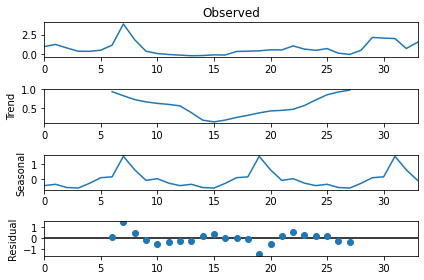

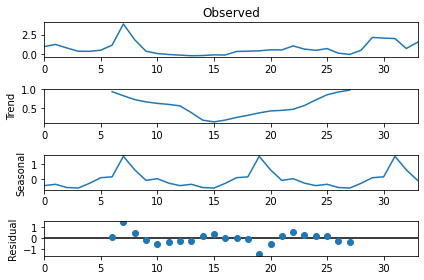

In [70]:
DecomposeResult.plot()

In [71]:
df2 = pd.concat([B.reset_index(), pd.DataFrame({'seasonal':DecomposeResult.seasonal})], axis=1)
df2

,index,date,freq1,freq2,freq3,freq4,freq5,freq6,inc,next_inc,date_type,seasonal
0,0,2018-01,118.0,27.8,119.4,136.8,24.9,104.6,1.123291,0.985812,2018-01-01,-0.423469
1,1,2018-02,122.8,30.8,119.8,135.6,27.9,105.8,0.985812,1.254173,2018-02-01,-0.333705
2,2,2018-03,103.9,25.4,108.4,120.0,24.2,95.1,1.254173,0.811846,2018-03-01,-0.549169
3,3,2018-04,79.0,10.6,95.1,114.7,15.8,89.2,0.811846,0.398194,2018-04-01,-0.586020
4,4,2018-05,80.0,9.4,95.9,112.5,13.5,88.4,0.398194,0.389226,2018-05-01,-0.269626
5,5,2018-06,77.8,9.9,97.5,121.0,15.1,91.8,0.389226,0.528448,2018-06-01,0.107762
6,6,2018-07,84.1,13.2,105.3,131.3,16.1,98.7,0.528448,1.167756,2018-07-01,0.165547
7,7,2018-08,128.0,41.6,126.9,142.8,30.6,109.7,1.167756,3.834897,2018-08-01,1.542135
8,8,2018-09,164.5,50.7,133.0,139.4,39.1,116.9,3.834897,1.838437,2018-09-01,0.634108
9,9,2018-10,86.0,9.3,97.2,124.7,19.6,101.5,1.838437,0.395093,2018-10-01,-0.073558


In [72]:
# Q3
_ = """
Q3. base table를 활용하여 6가지 주요 지표와 아파트 매매가격 전월대비 증감률을 
    다중회귀분석을 통해 각 지표별 회귀계수를 확인하고자 한다. 

    먼저 독립변수와 종속변수에 해당하는 변수 모두 minmax방식으로 정규화를 진행한다.

    다음으로 18년, 19년 데이터는 트레인 셋으로 20년 데이터는 테스트셋으로 분할(20년 1~10월까지)한다. 

    이후 아래와 같이 독립변수와 종속변수를 지정한 후 모델을 실행한다. 

    이때 회귀계수가 가장 높은 변수와 회귀계수를 확인하시오​​

    (소수 셋째자리 버림, 둘째자리까지 구하기)

"""

In [80]:
X_train = B[0:24][['freq1','freq2','freq3','freq4','freq5','freq6']]
X_test = B[24:][['freq1','freq2','freq3','freq4','freq5','freq6']]
y_train = B[0:24].next_inc
y_test = B[24:].next_inc

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)

LinearRegression()

In [84]:
model.coef_

array([ 0.00812738,  0.10462351, -0.02149243,  0.03138456, -0.11364613,
       -0.03779129])

In [85]:
model.intercept_

2.5661304477649938